In [ ]:
import numpy as np
import re

with open("1/input.txt", "r") as inpt:
    instrusctions = np.array([[(-1 if match[0] == "L" else 1) * (int(match[1]))] for match in re.findall(r"(L|R)(\d+)", inpt.read())])

dial = 50
passwd = 0

for i in instrusctions:
    dial += i
    dial %= 100
    position = np.exp(1j * (dial / 100) * 2 * np.pi)
    
    if abs(position - 1+0j) < 1e-15:
        passwd += 1
    print(position)   
        
print(passwd)   

[-0.36812455-0.92977649j]
[-0.99802673-0.06279052j]
[-0.53582679+0.84432793j]
[-0.95105652-0.30901699j]
[-0.68454711-0.72896863j]
[-0.80901699+0.58778525j]
[0.9921147-0.12533323j]
[-0.77051324-0.63742399j]
[0.42577929-0.90482705j]
[-0.12533323-0.9921147j]
[-0.84432793-0.53582679j]
[0.98228725-0.18738131j]
[0.90482705+0.42577929j]
[-0.06279052+0.99802673j]
[-0.98228725-0.18738131j]
[0.92977649+0.36812455j]
[0.90482705-0.42577929j]
[0.80901699-0.58778525j]
[-0.95105652+0.30901699j]
[-0.42577929+0.90482705j]
[0.77051324-0.63742399j]
[-0.87630668-0.48175367j]
[-0.12533323-0.9921147j]
[0.80901699-0.58778525j]
[0.99802673+0.06279052j]
[-0.99802673-0.06279052j]
[-0.77051324-0.63742399j]
[-0.72896863+0.68454711j]
[-0.95105652+0.30901699j]
[-0.98228725+0.18738131j]
[0.96858316-0.24868989j]
[0.36812455+0.92977649j]
[0.77051324+0.63742399j]
[0.18738131+0.98228725j]
[0.18738131-0.98228725j]
[0.98228725-0.18738131j]
[0.58778525+0.80901699j]
[-0.24868989+0.96858316j]
[-0.30901699-0.95105652j]
[-0.48

In [ ]:
import numpy as np
import re

def SequenceDetector(num):
    # arr = np.fromiter(str(num), dtype=int)
    arr = str(num)
    for i in range(1, len(arr) // 2 + 1):
        kernel = arr[0:i+1]
        result = re.findall(f"{kernel}", arr)
        print(kernel, result, end="    ")
        if len(result) * len(kernel) == len(arr):
            print(True)
            break
        else:
            print(False)

def SequenceDetectorOpt(num):
    # arr = np.fromiter(str(num), dtype=int)
    arr = str(num)
    result = re.match(r"^(.*)\1+$", arr)
    print(result[0])
    
    
    if arr == result[0]:
        print(True)
    else:
        print(False)
    

SequenceDetectorOpt(11)
SequenceDetectorOpt(99)
SequenceDetectorOpt(222222)
SequenceDetectorOpt(446446)
SequenceDetectorOpt(2121212121)


11
True
99
True
222222
True
446446
True
2121212121
True


In [76]:
2121212121 > 2121212118

True

In [80]:
arr = str(2121)
arr[:len(arr) // 2]


'21'

array([[0, 0, 3, 3, 0, 3, 3, 4, 3, 0],
       [3, 6, 6, 0, 4, 0, 4, 0, 5, 4],
       [4, 7, 6, 7, 5, 0, 2, 0, 4, 4],
       [4, 0, 6, 7, 7, 6, 0, 0, 4, 0],
       [3, 5, 0, 7, 8, 7, 5, 0, 4, 3],
       [0, 4, 6, 5, 7, 6, 6, 5, 0, 4],
       [0, 4, 0, 6, 0, 5, 0, 6, 7, 4],
       [2, 0, 6, 6, 6, 0, 6, 7, 7, 4],
       [0, 5, 5, 7, 6, 7, 6, 7, 5, 0],
       [1, 0, 3, 0, 4, 5, 4, 0, 2, 0]])

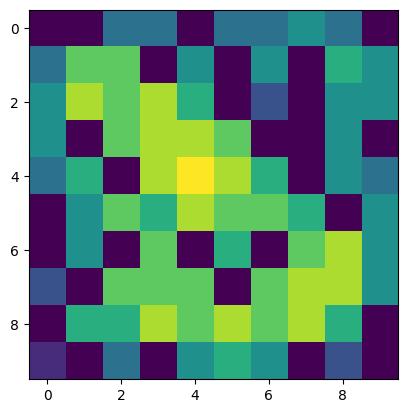

In [11]:
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt


solution = []

with open("4/input.txt", "r") as inpt:
    fmap = np.array([[1 if c == "@" else 0 for c in n if c != "\n"] for n in inpt.readlines()])

kernel = np.array([[1, 1, 1], 
                   [1, 0, 1], 
                   [1, 1, 1]]) # This kernel will basically just count how many neighbouring tiles are occupied

conv = scipy.signal.convolve2d(fmap, kernel)[1:-1, 1:-1] # by default, convolve2d fills boundary with 0's, [1:-1, 1:-1] just slices out original part
neighMap = conv * fmap # Reset values of empty tiles to 0




solution.append(np.sum(fmap[neighMap < 4]))
# fmap[neighMap < 4] = 0 

plt.imshow(neighMap)
neighMap

In [1]:
import re

with open("5/input.txt", "r") as inpt:
    inpt = inpt.read()
    ranges = [[int(d1), int(d2)] for d1, d2 in re.findall(r"^(\d+)-(\d+)$", inpt, re.MULTILINE)]
    items = [int(d) for d in re.findall(r"^\d+$", inpt, re.MULTILINE)]


# for item in items:
#     for low, high in ranges:
#         if item >= low and item <= high:
#             solution_1 += 1
#             break

import matplotlib.pyplot as plt
rg = np.transpose(ranges)
# fig = plt.figure(figsize=(30, 30))

for i, (start, end) in enumerate(ranges):
    plt.hlines(i, start, end, colors='blue', linewidth=4)
plt.yticks(range(len(ranges)), [f'Range {i+1}' for i in range(len(ranges))])
plt.xlabel("Value")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '5/input.txt'

In [42]:
list(range(3, 4))

[3]